# Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/mp_nostruct.csv')

In [3]:
data = pd.DataFrame(df)

In [4]:
data.head(5)

,material_id,pretty_formula,e_above_hull,band_gap,total_magnetization,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH,energy,energy_per_atom,formation_energy_per_atom
0,mp-85,In,0.003319,0.0000,2.700000e-05,1.044699,33.154748,4.904836,-2.721563,-2.721563,0.003319
1,mp-110,Mg,0.039182,0.0000,-1.360000e-05,-11.326659,35.636106,1.830272,-1.565153,-1.565153,0.039182
2,mp-20,Be,0.108143,0.0000,1.000000e-07,8.030000,124.000000,84.000000,-14.537871,-3.634468,0.108143
3,mp-8640,Hf,0.071216,0.0000,-2.050000e-05,0.881277,101.242732,44.836516,-9.883049,-9.883049,0.071216
4,mp-674158,P,3.509988,2.0113,3.000042e+00,10.884643,0.327165,-0.064038,-1.895193,-1.895193,3.509988


In [5]:
data.shape

(83989, 11)

#EDA

In [16]:
# Get basic information about the dataset
print(data.info())

# Get summary statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83989 entries, 0 to 83988
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   material_id                    83989 non-null  object 
 1   pretty_formula                 83987 non-null  object 
 2   e_above_hull                   83989 non-null  float64
 3   band_gap                       83989 non-null  float64
 4   total_magnetization            83989 non-null  float64
 5   elasticity.elastic_anisotropy  7676 non-null   float64
 6   elasticity.K_VRH               7676 non-null   float64
 7   elasticity.G_VRH               7676 non-null   float64
 8   energy                         83989 non-null  float64
 9   energy_per_atom                83989 non-null  float64
 10  formation_energy_per_atom      83989 non-null  float64
dtypes: float64(9), object(2)
memory usage: 7.0+ MB
None
       e_above_hull      band_gap  total_magnetization

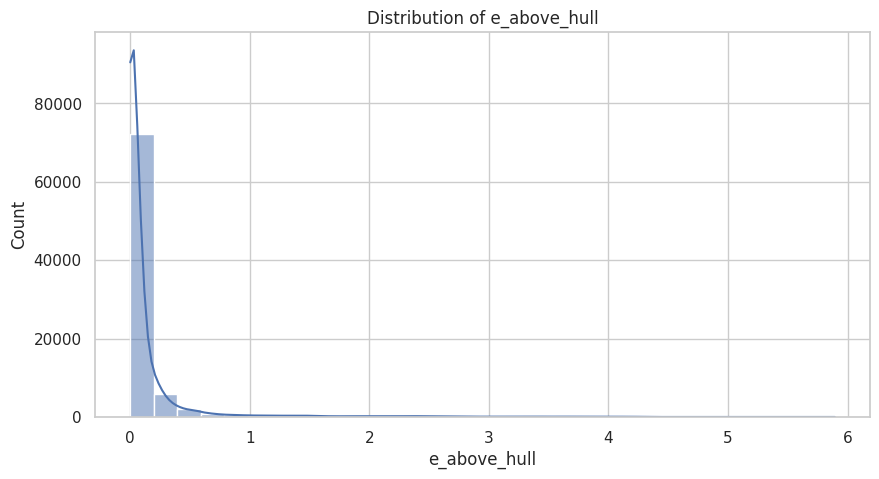

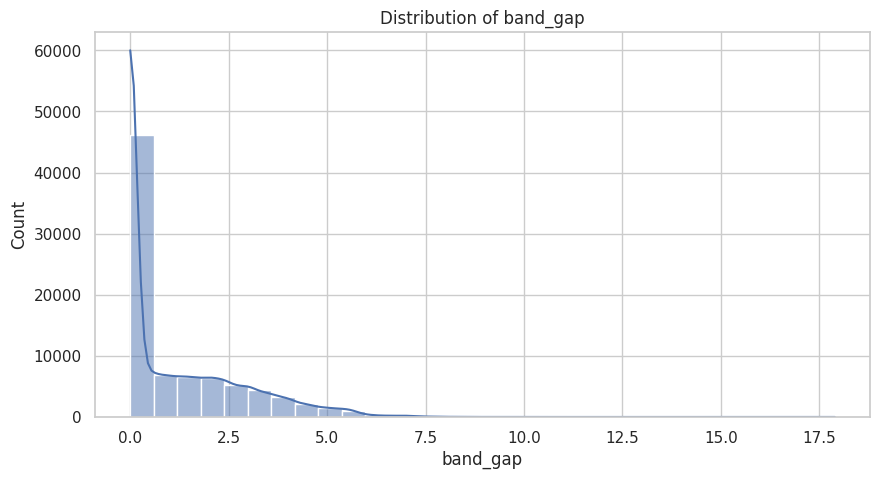

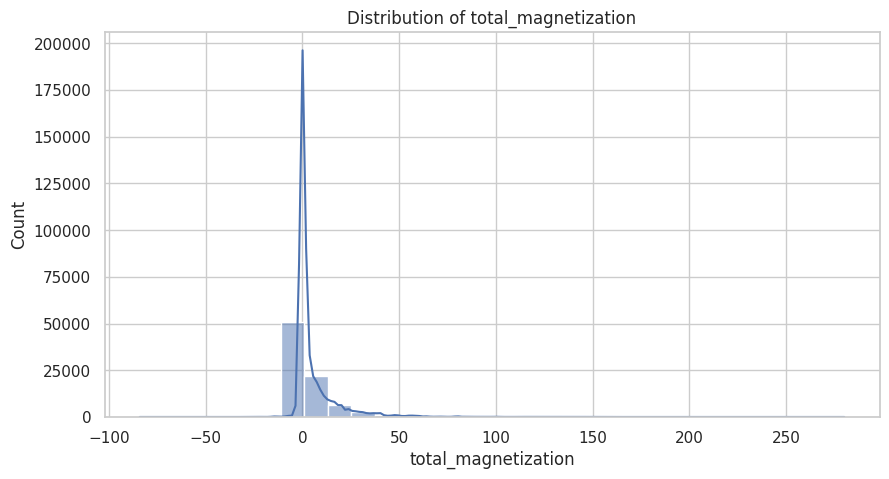

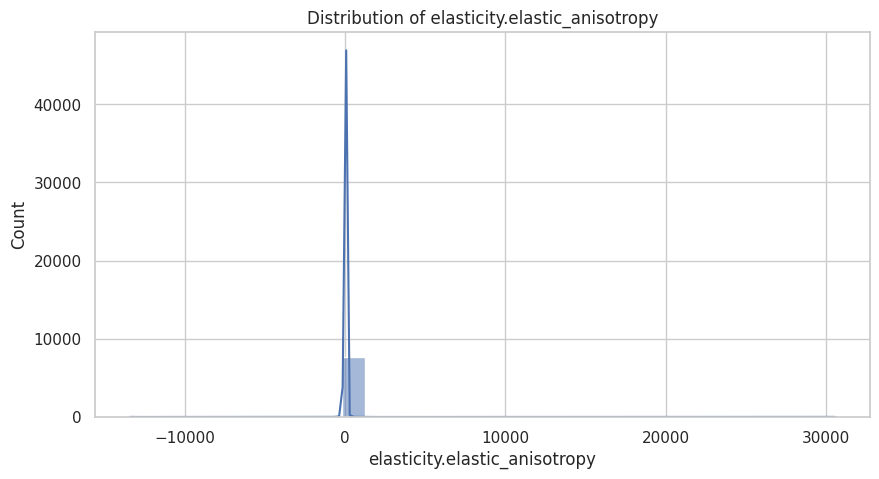

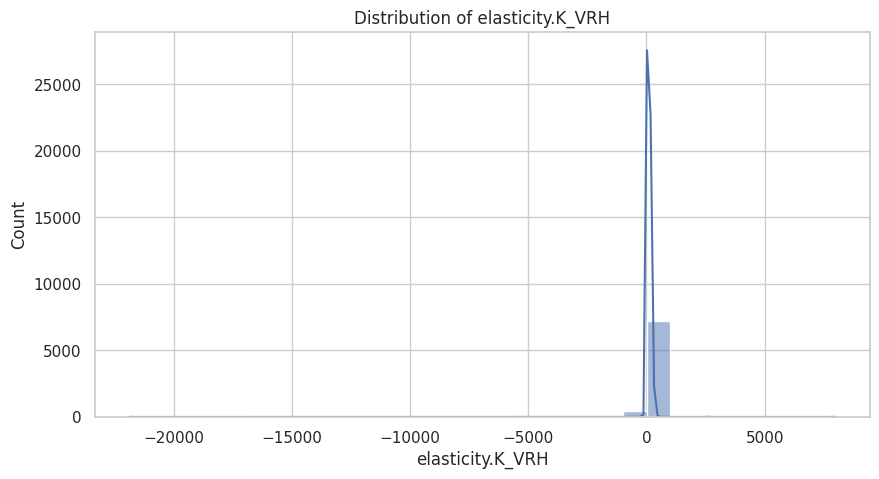

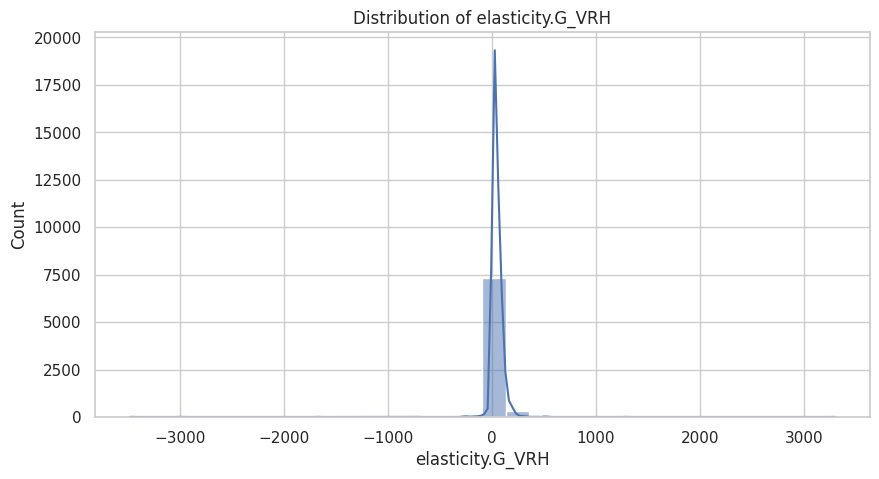

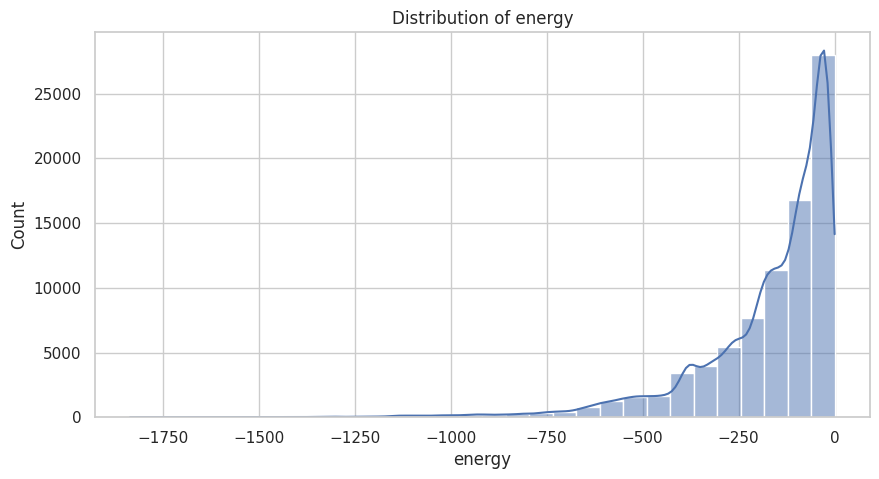

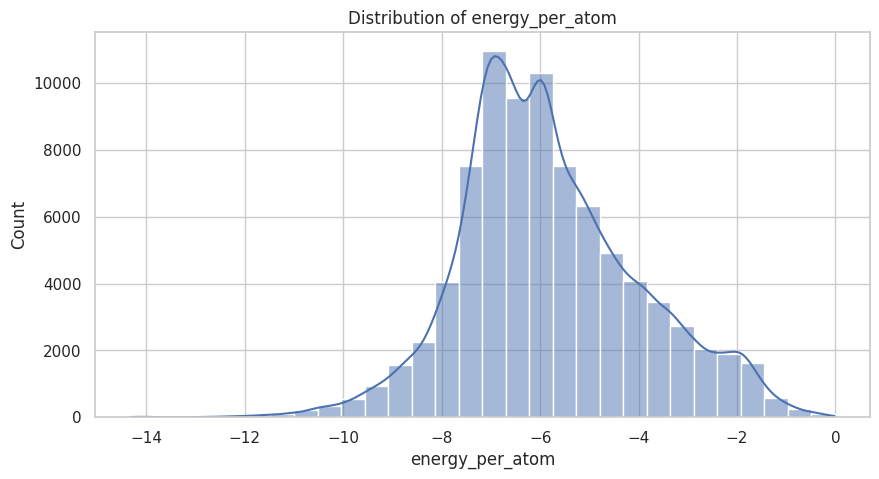

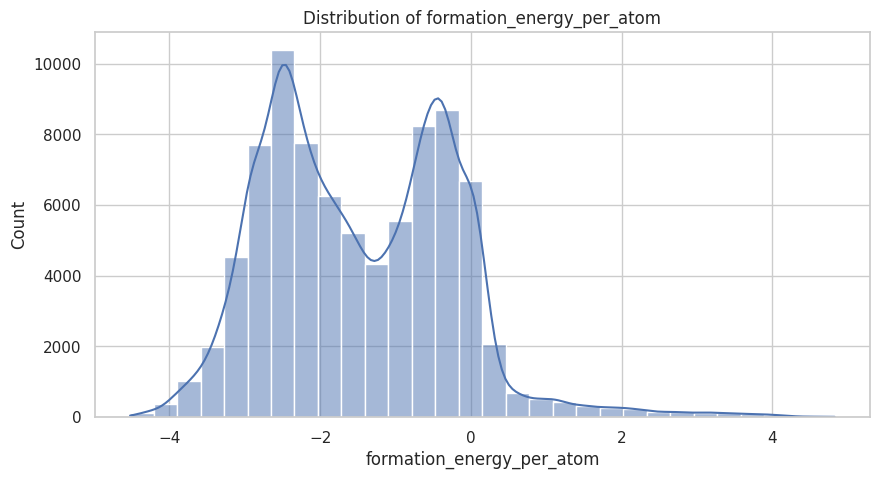

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot distributions for numerical features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

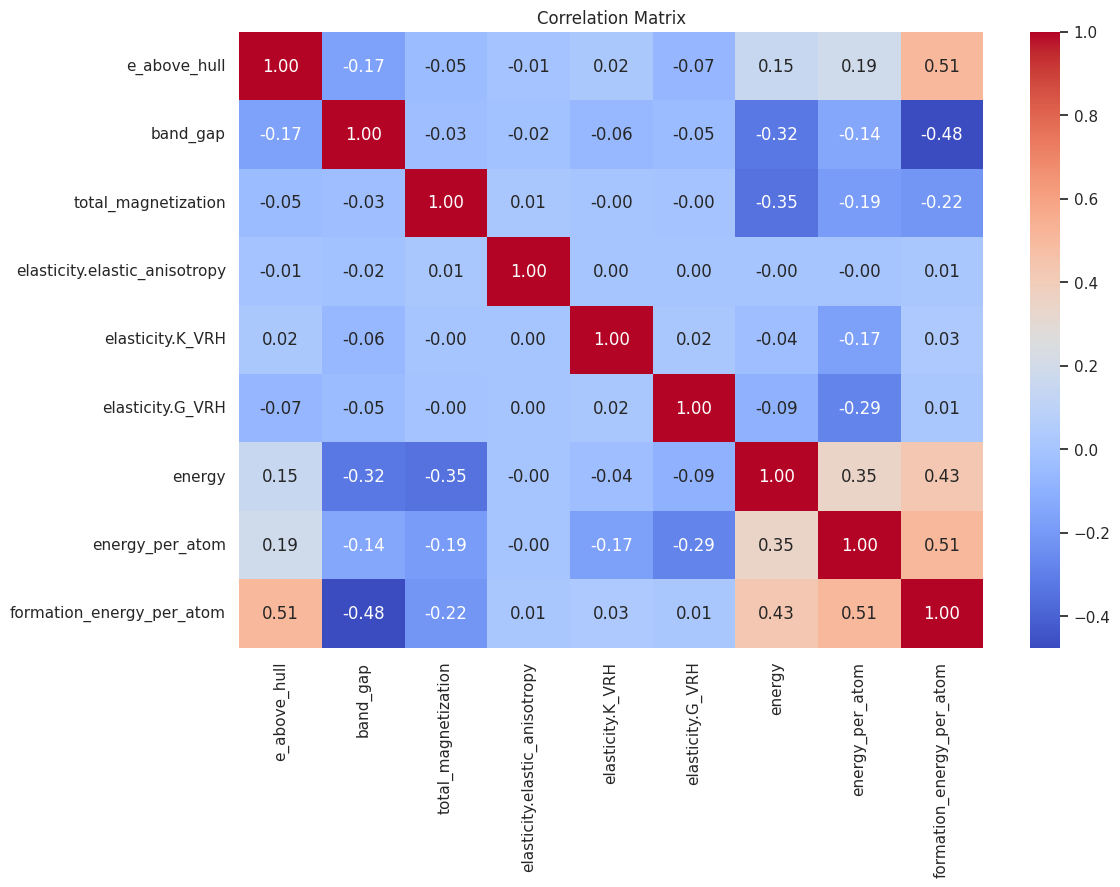

In [21]:
# Compute the correlation matrix
corr_matrix = data.drop(columns=['material_id', 'pretty_formula']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

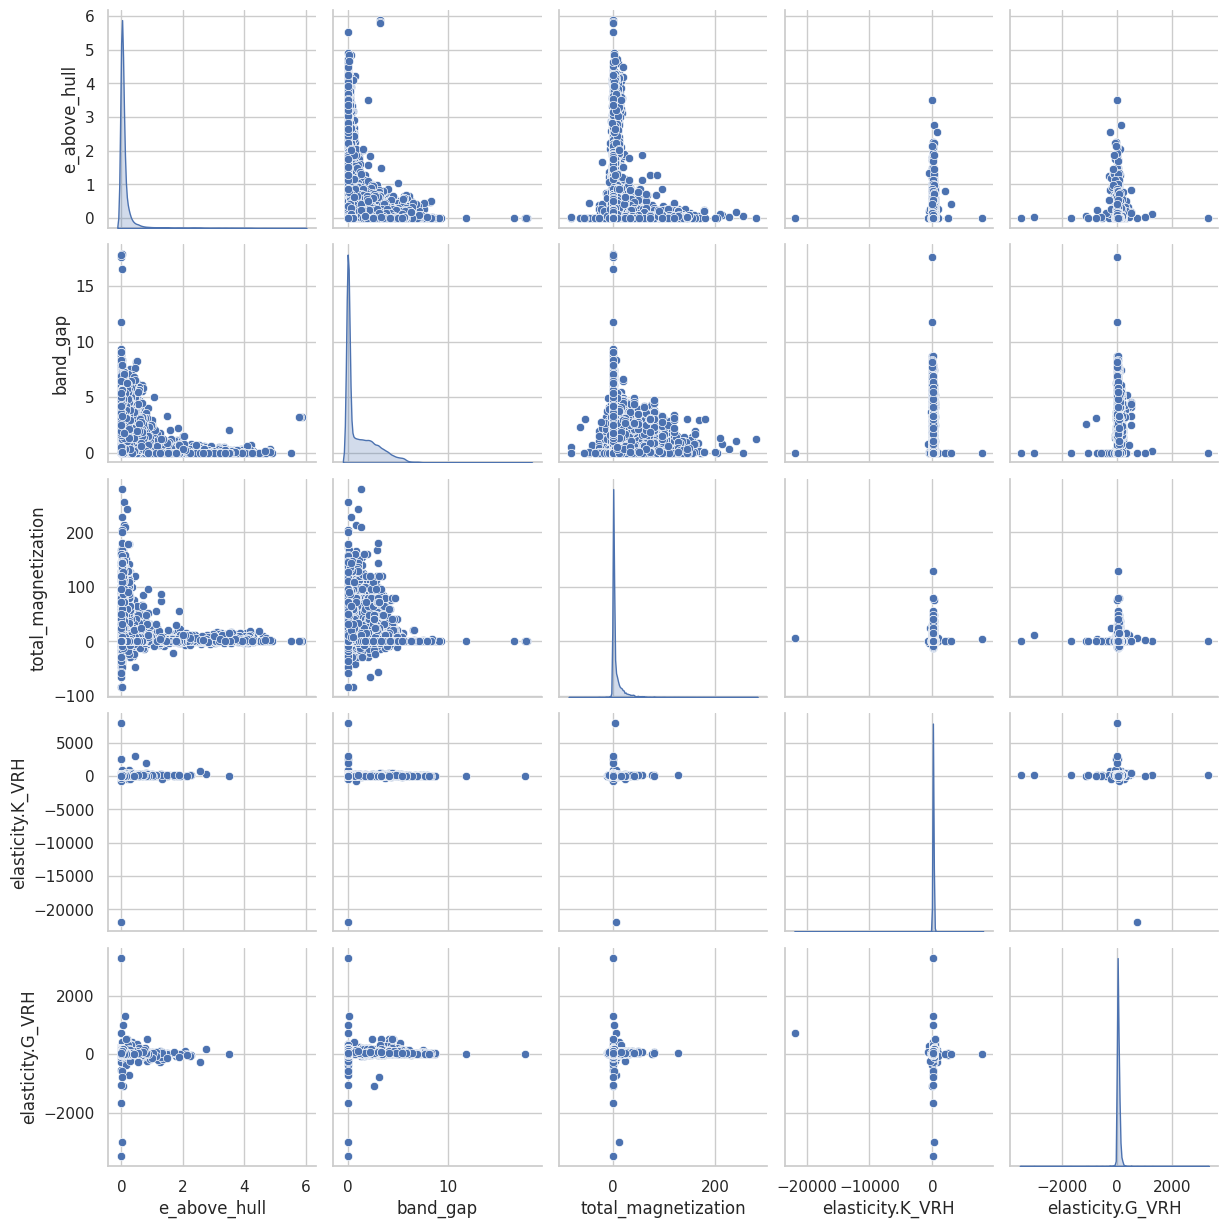

In [22]:
# Select a subset of features for the pair plot to avoid overcrowding
subset = data[['e_above_hull', 'band_gap', 'total_magnetization', 'elasticity.K_VRH', 'elasticity.G_VRH']]

# Plot the pair plot
sns.pairplot(subset, diag_kind='kde')
plt.show()


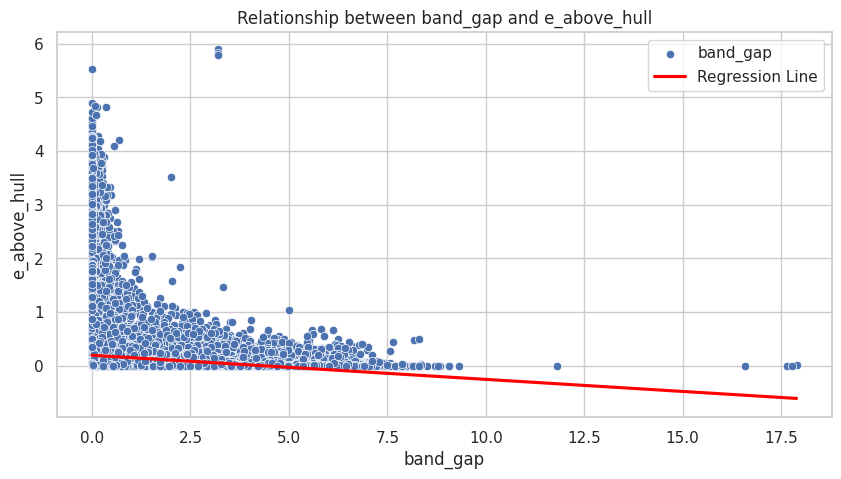

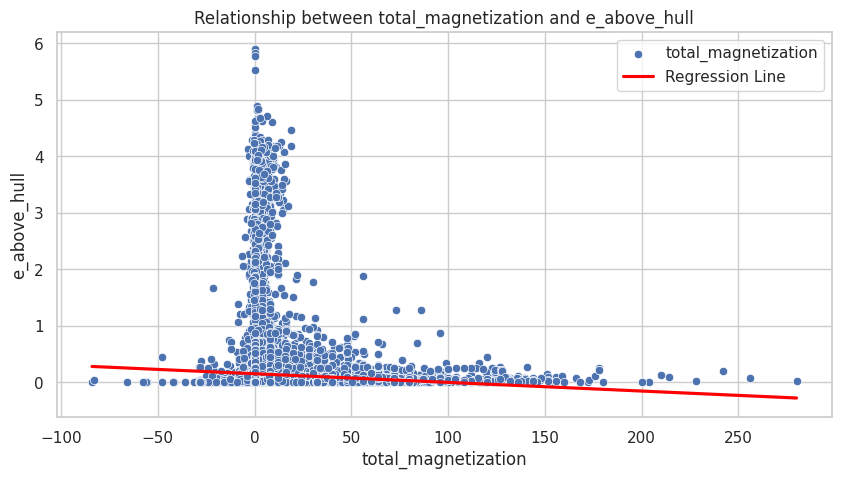

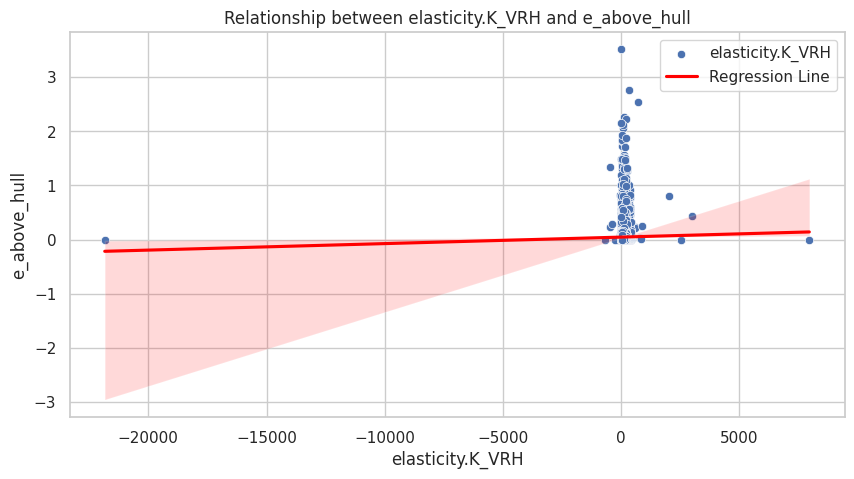

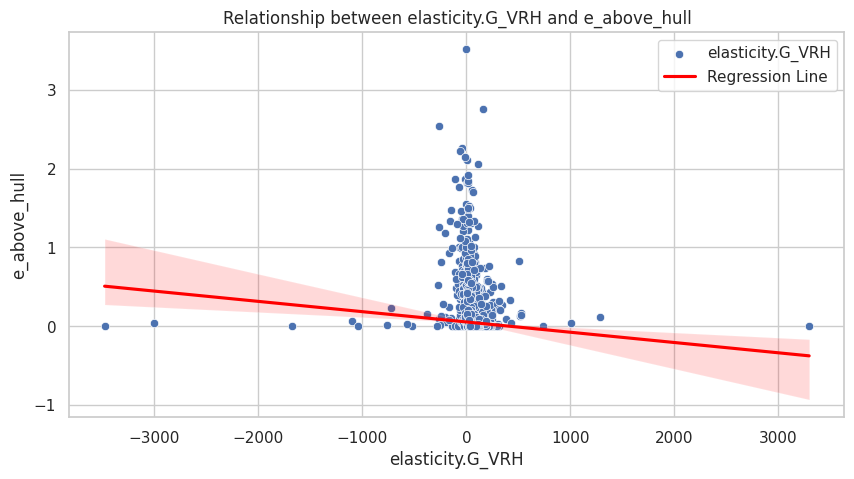

In [24]:
# Scatter plots with regression lines
key_features = ['band_gap', 'total_magnetization', 'elasticity.K_VRH', 'elasticity.G_VRH']

for col in key_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data[col], y=data['e_above_hull'], label=col)
    sns.regplot(x=data[col], y=data['e_above_hull'], scatter=False, color='red', label='Regression Line')
    plt.title(f'Relationship between {col} and e_above_hull')
    plt.xlabel(col)
    plt.ylabel('e_above_hull')
    plt.legend()
    plt.show()


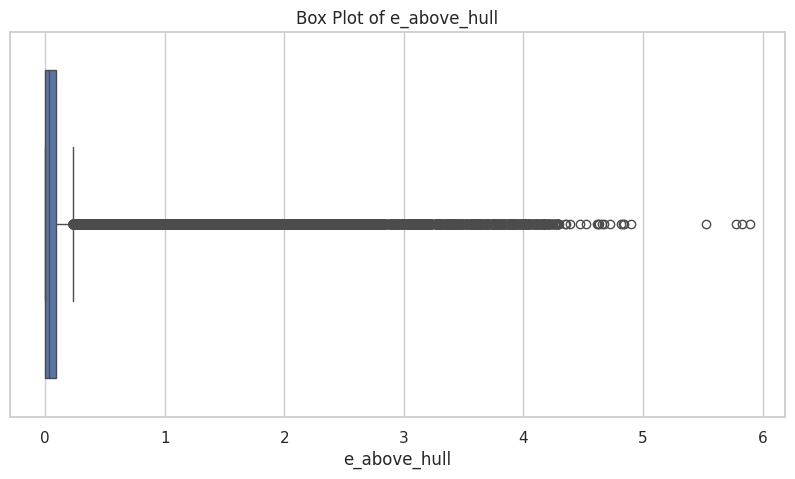

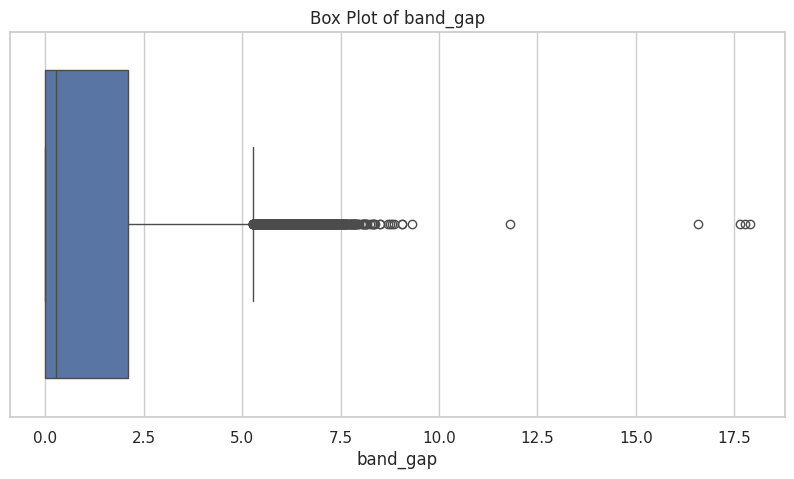

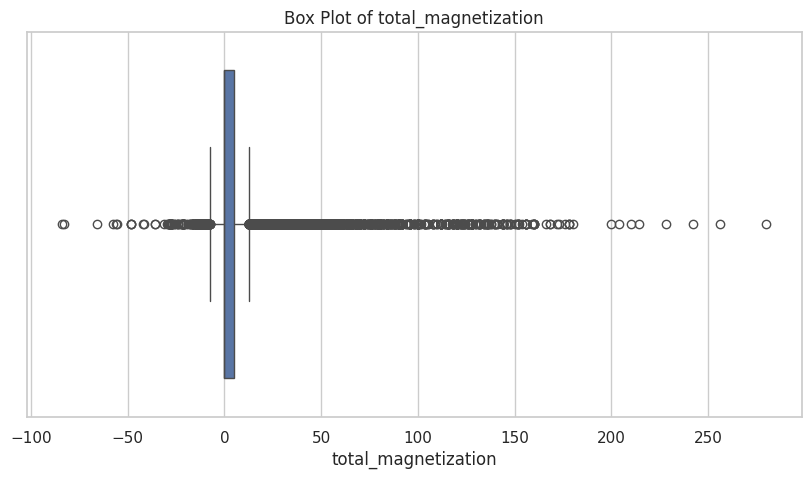

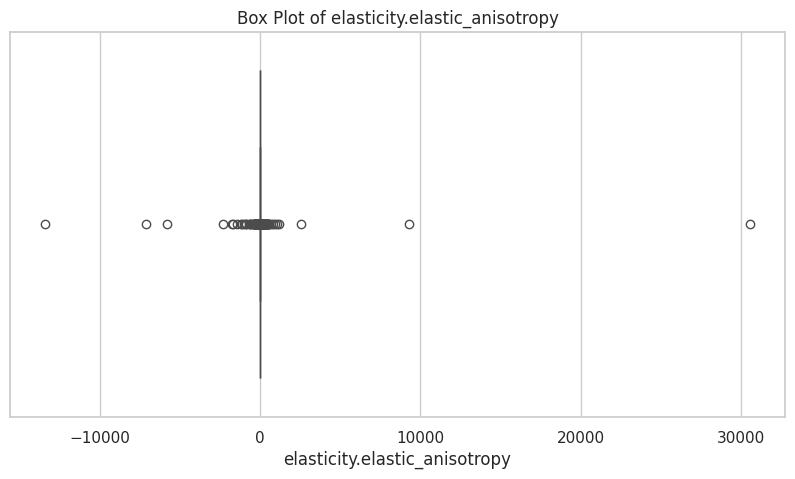

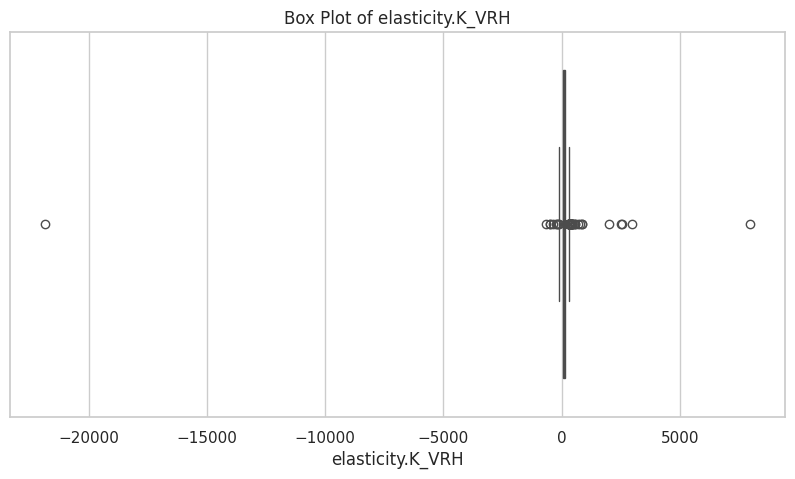

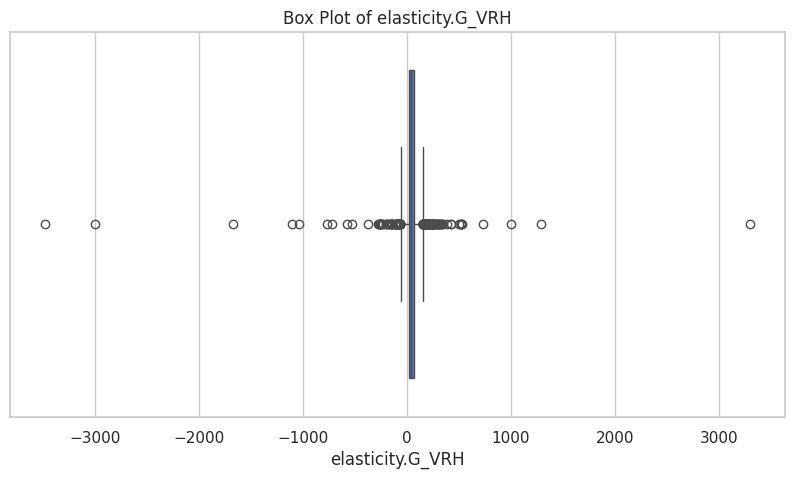

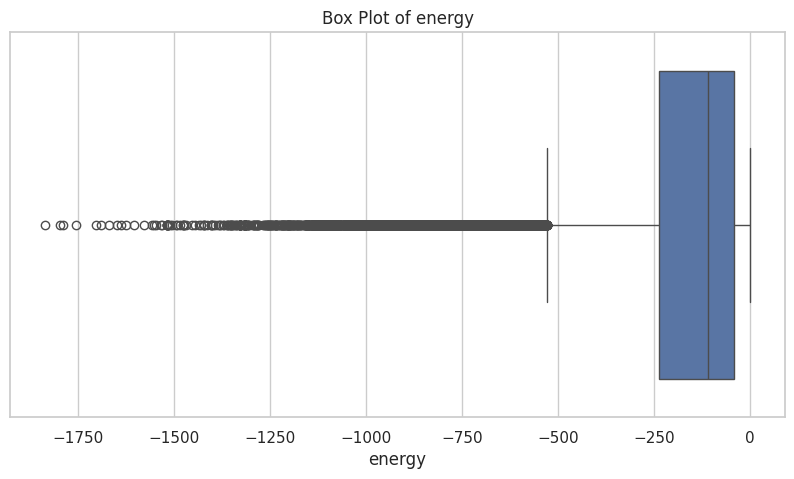

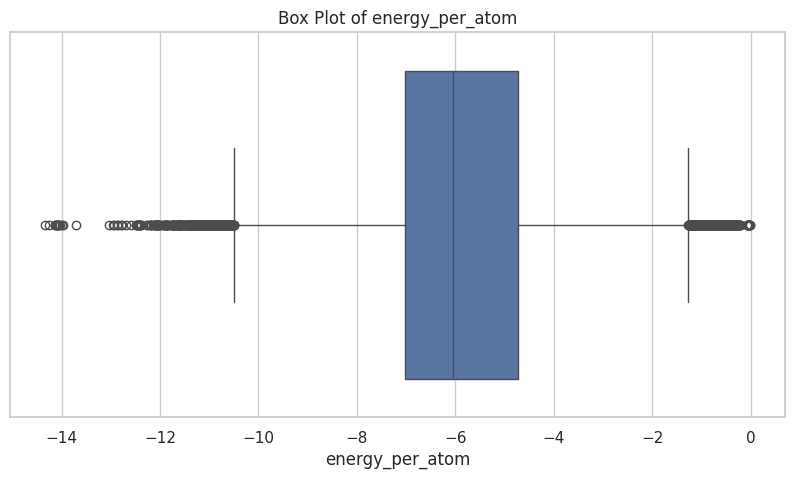

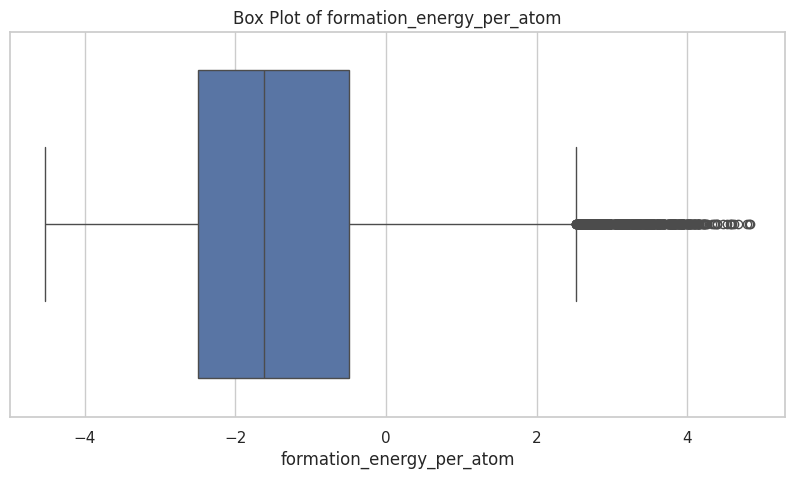

In [25]:
# Plot box plots for numerical features
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

#Data Processing

In [6]:
dsX = df.drop(columns=['e_above_hull', 'material_id', 'pretty_formula'])
y = df['e_above_hull']

In [7]:
X = X.fillna(X.mean())

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Basic Model Training

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}

#Results

In [15]:
# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']:.4f}, MAE: {metrics['MAE']:.4f}, R²: {metrics['R²']:.4f}")

Linear Regression - RMSE: 0.3657, MAE: 0.2238, R²: 0.2738
Decision Tree - RMSE: 0.1699, MAE: 0.0723, R²: 0.8434
Random Forest - RMSE: 0.1207, MAE: 0.0586, R²: 0.9210
Gradient Boosting - RMSE: 0.1314, MAE: 0.0711, R²: 0.9062


#Neural Networks

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [27]:
def build_simple_nn(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_deep_nn(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_wide_and_deep_nn(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# Define a function to evaluate models
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) * 100  # Convert R² to percentage
    return rmse, mae, r2

In [29]:
# Prepare input shape
input_shape = (X_train_scaled.shape[1],)

In [30]:
# Build and train Simple Neural Network
simple_nn = build_simple_nn(input_shape)
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Build and train Deep Neural Network
deep_nn = build_deep_nn(input_shape)
deep_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Build and train Wide and Deep Neural Network
wide_deep_nn = build_wide_and_deep_nn(input_shape)
wide_deep_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

In [31]:
# Evaluate all models
models = {
    'Simple NN': simple_nn,
    'Deep NN': deep_nn,
    'Wide and Deep NN': wide_deep_nn
}

results = {}
for name, model in models.items():
    rmse, mae, r2 = evaluate_model(model, X_test_scaled, y_test)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R² (%)': r2}

525/525 [==============================] - 3s 6ms/step


#Results of Neural Networks

In [32]:
# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']:.4f}, MAE: {metrics['MAE']:.4f}, R²: {metrics['R² (%)']:.2f}%")

Simple NN - RMSE: 0.1354, MAE: 0.0724, R²: 90.04%
Deep NN - RMSE: 0.1270, MAE: 0.0639, R²: 91.25%
Wide and Deep NN - RMSE: 0.1285, MAE: 0.0698, R²: 91.04%


#Final Results

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the results dictionary
results = {
    'Simple NN': {'RMSE': 0.1354, 'MAE': 0.0724, 'R² (%)': 90.04},
    'Deep NN': {'RMSE': 0.1270, 'MAE': 0.0639, 'R² (%)': 91.25},
    'Wide and Deep NN': {'RMSE': 0.1285, 'MAE': 0.0698, 'R² (%)': 91.04},
    'Linear Regression': {'RMSE': 0.3657, 'MAE': 0.2238, 'R² (%)': 27.38},
    'Decision Tree': {'RMSE': 0.1699, 'MAE': 0.0723, 'R² (%)': 84.34},
    'Random Forest': {'RMSE': 0.1207, 'MAE': 0.0586, 'R² (%)': 92.10},
    'Gradient Boosting': {'RMSE': 0.1314, 'MAE': 0.0711, 'R² (%)': 90.62}
}

# Convert the results to a DataFrame for easier plotting
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

<ipython-input-34-1595d3ba211d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')


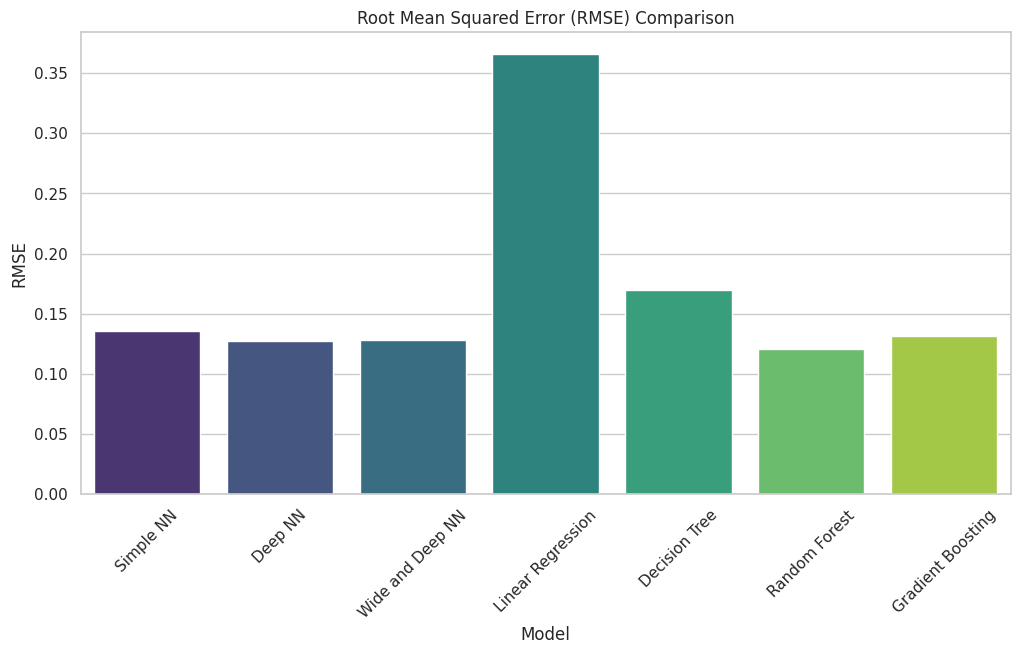

In [34]:
# Plot RMSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

<ipython-input-35-0963362cdac3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')


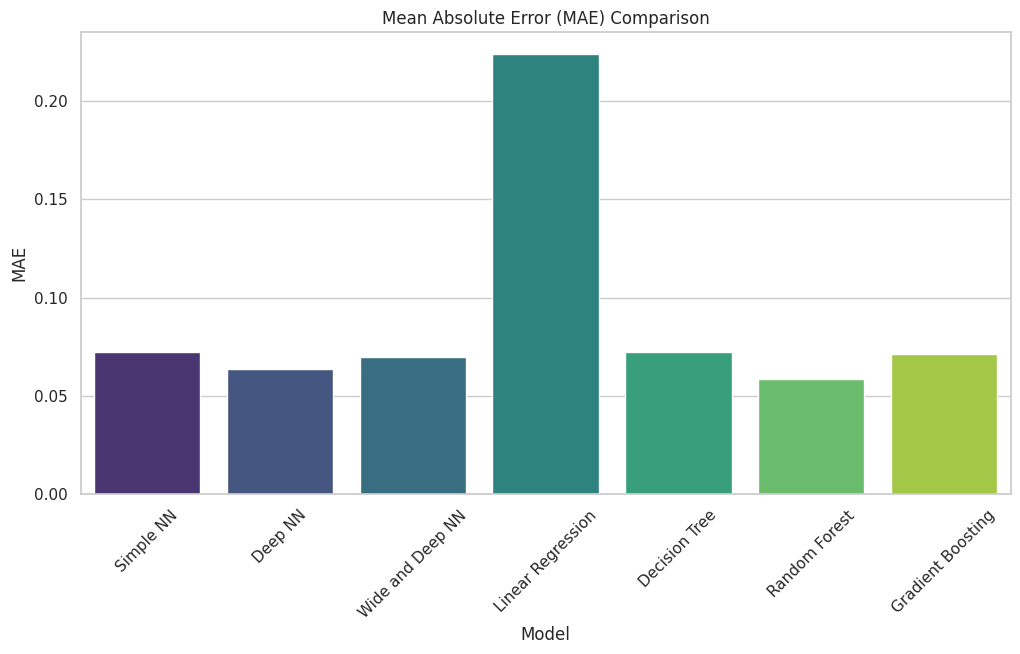

In [35]:
# Plot MAE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

<ipython-input-36-cc43a04a147a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² (%)', data=results_df, palette='viridis')


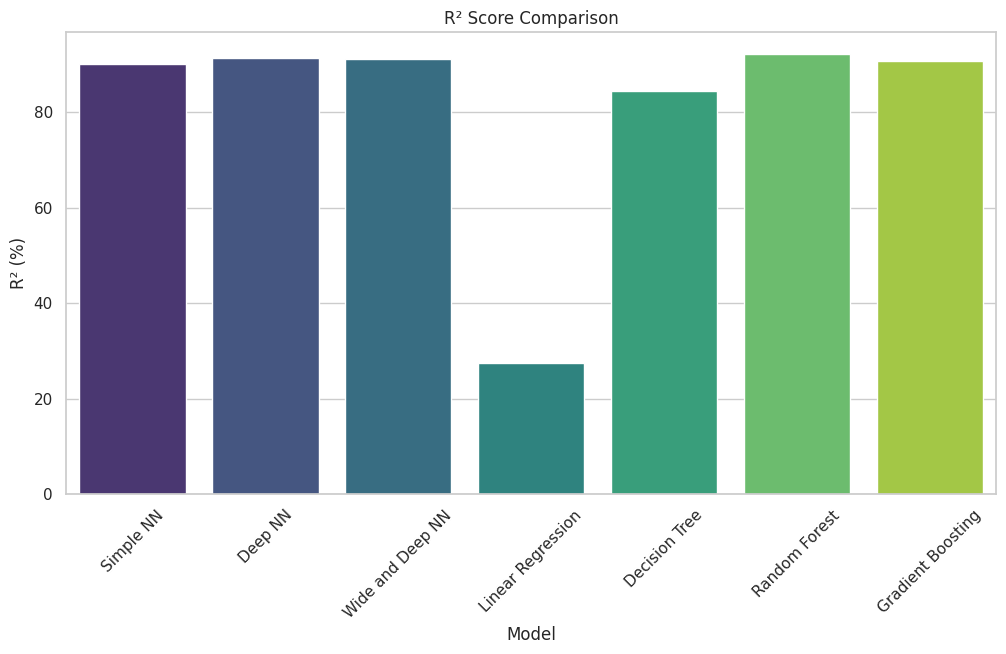

In [36]:
# Plot R² Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² (%)', data=results_df, palette='viridis')
plt.title('R² Score Comparison')
plt.ylabel('R² (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()